# Source-Based Fake News Classification

## Introduction
The rise of social media as a primary news consumption platform has brought both opportunities and challenges. While it provides instant access to information, it also enables the rapid spread of misinformation. Ensuring the authenticity of news content has become a critical concern, as fake news posted by politicians, media outlets, or even civilians can influence public opinion and lead to widespread consequences.

This notebook explores source-based fake news classification, leveraging the comprehensive dataset “Getting Real about Fake News.” By focusing on source information, such as authors, publication dates, and news labels, we aim to design a system that identifies and mitigates misinformation effectively.

Key highlights of this notebook include:

* **Dataset Preparation:** Preprocessing and eliminating skew to ensure reliable input data.
* **Exploratory Analysis:** Gaining insights into patterns and correlations in the dataset.
* **Modeling and Evaluation:** Developing and assessing a classification model to label news based on authenticity.

### Why Source-Based Classification?

Unlike other datasets, “Getting Real about Fake News” stands out for its inclusion of source information, a critical element in verifying the credibility of news. By citing the origins of news articles, this approach offers a more nuanced way to determine trustworthiness and classify content effectively.

## Objectives

* Build practical tools for users to gain insights into the authenticity of the news they consume.
* Raise awareness about the dangers of misinformation.
* Inspire the development of plugins, fact-checking sites, and accessible applications to inform and educate the public.
Let’s dive into the data and uncover how we can combat misinformation with data-driven methods.

## 📊 Data Exploration and Visualization  

### Importing Libraries  
Essential libraries are imported to handle tasks such as data manipulation, visualization, and machine learning:  
- `numpy` and `pandas` for numerical and data manipulation.  
- `matplotlib`, `seaborn`, and `plotly` for data visualization.  
- `scikit-learn` for machine learning preprocessing, model building, and evaluation.  

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from math import pi

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

### Loading the Dataset  
The dataset `news_articles.csv` is loaded to analyze its structure and understand its format. We examine the first few rows, inspect column types, and check for missing values.

In [71]:
data = pd.read_csv('news_articles.csv')
print(data.head())  # Display first 5 rows of the dataset
print(data.info())  # Display dataset information (columns, data types, non-null counts)
data.tail(15)       # Display the last 15 rows for additional insights

                 author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                Fed Up  2016-11-01T05:22:00.000+02:00   
4                Fed Up  2016-11-01T21:56:00.000+02:00   

                                               title  \
0  muslims busted they stole millions in govt ben...   
1  re why did attorney general loretta lynch plea...   
2  breaking weiner cooperating with fbi on hillar...   
3  pin drop speech by father of daughter kidnappe...   
4  fantastic trumps  point plan to reform healthc...   

                                                text language  \
0  print they should pay all the back all the mon...  english   
1  why did attorney general loretta lynch plead t...  english   
2  red state  \nfox news sunday reported this mor...  english   
3  email kayla mueller was a prisoner and torture...  

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
2081,-NO AUTHOR-,2016-10-27T06:30:35.864+03:00,dems sue gop over trumps rigged complaints,NaN,english,wnd.com,http://mobile.wnd.com/files/2016/10/tax_paymen...,bias,Real,dems sue gop trumps rigged complaints,NaN,1.0
2082,-NO AUTHOR-,2016-10-27T06:32:38.028+03:00,yearold hebrew mention of jerusalem found,NaN,english,wnd.com,http://mobile.wnd.com/files/2016/07/trump_make...,bias,Real,hillary emails whitelisted obamas blackberry,NaN,1.0
2083,-NO AUTHOR-,2016-10-27T07:20:12.250+03:00,boycott targets trump family on retail front,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/obama_blackbe...,bias,Real,support assaultweapon ban hits record low,NaN,1.0
2084,-NO AUTHOR-,2016-10-27T07:20:12.436+03:00,obamacare tax penalty ill take it millions say,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/assault_weapo...,bias,Real,pope god promised land people israel,NaN,1.0
2085,-NO AUTHOR-,2016-10-27T08:14:27.425+03:00,dems sue gop over trumps rigged complaints,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/pope_francis_...,bias,Real,christs burial place exposed st time centuries,NaN,1.0
2086,-NO AUTHOR-,2016-10-27T08:20:38.377+03:00,hillary emails whitelisted for obamas blackberry,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/jpg_holy_sepu...,bias,Real,prof canoes reek genocide white privilege,NaN,1.0
2087,-NO AUTHOR-,2016-10-27T15:10:52.832+03:00,support for assaultweapon ban hits record low,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/canoe.jpg,bias,Real,teens walk free gangrape conviction,NaN,1.0
2088,-NO AUTHOR-,2016-10-27T15:24:15.986+03:00,pope god promised the land to people of israel,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/trial_teens_g...,bias,Real,school named munichmassacre mastermind,NaN,1.0
2089,-NO AUTHOR-,2016-10-27T15:24:17.638+03:00,christs burial place exposed for st time in ce...,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/Salah_Khalaf.jpg,bias,Real,russia unveils satan missile,NaN,1.0
2090,-NO AUTHOR-,2016-10-27T15:36:09.934+03:00,prof canoes reek of genocide white privilege,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/satan2_missil...,bias,Real,check hillarythemed haunted house,NaN,1.0


### Handling Missing Data  
Missing values are identified and dropped to ensure a clean dataset for further analysis.  

In [72]:
data.isnull().sum()  # Check for missing values
df = data.dropna()   # Drop rows with missing values
df.head()            # Display the cleaned dataset

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


### Data Overview  
The dataset is summarized based on the target labels to understand their distribution and key statistics, offering insights into the structure of the data.

In [73]:
df.groupby('label').describe()

hasImage                                             
         count      mean       std  min  25%  50%  75%  max
label                                                      
Fake    1291.0  0.736638  0.440628  0.0  0.0  1.0  1.0  1.0
Real     754.0  0.834218  0.372132  0.0  1.0  1.0  1.0  1.0

### Visualizing Label Distribution  
The distribution of news labels is visualized to identify any class imbalances and to gain insights into the types of news articles available in the dataset.

<Axes: xlabel='count', ylabel='label'>

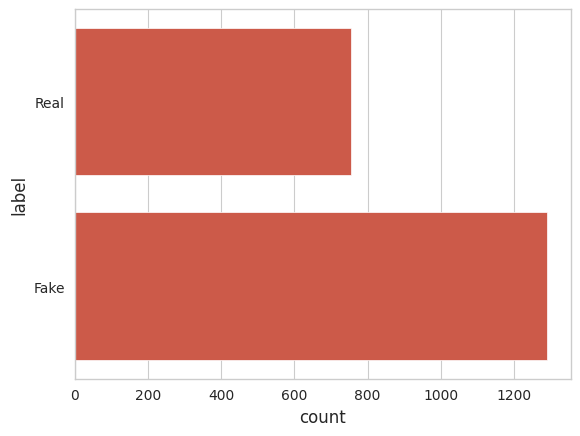

In [74]:
sns.set_style("whitegrid")
sns.countplot(df['label'])  # Plot distribution of labels

### Visualizing Article Types  
A pie chart is used to represent the proportions of different article types, providing a clear overview of the dataset's composition.  

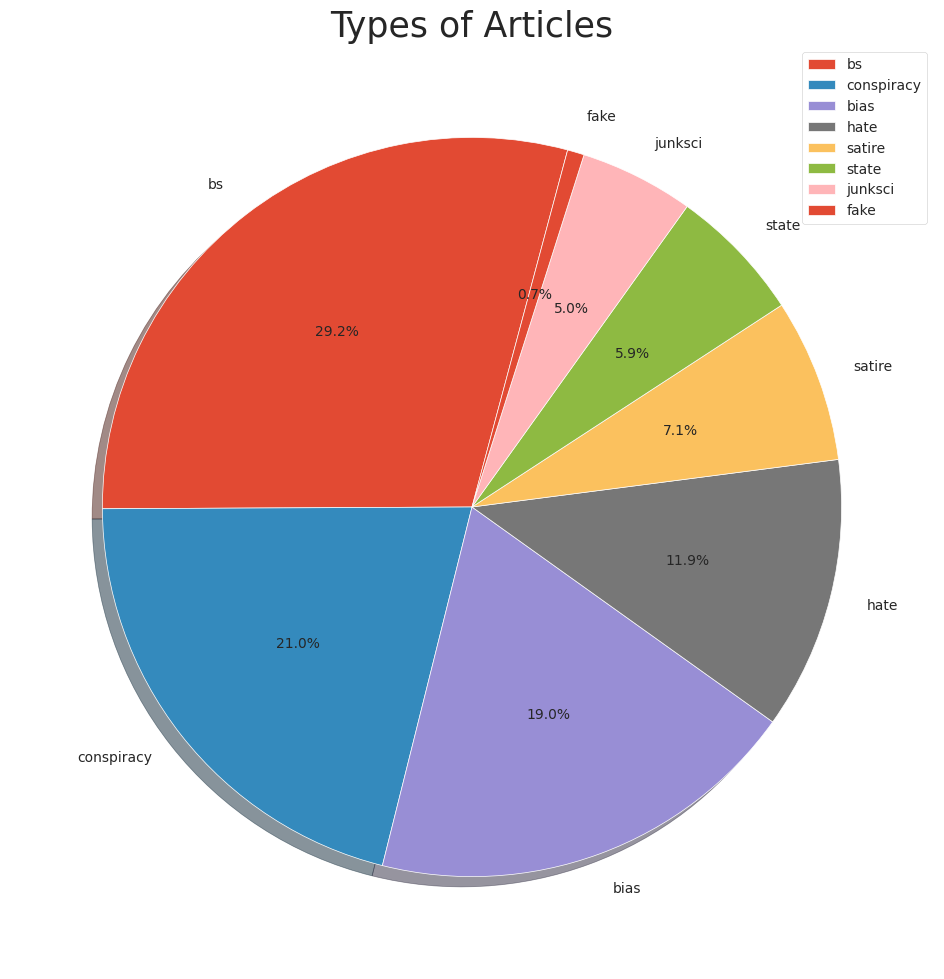

In [50]:
df['type'].value_counts().plot.pie(figsize = (15,12), startangle = 75, autopct = "%.1f%%", shadow=True)
plt.title('Types of Articles', fontsize = 25)
plt.axis('off')
plt.legend()
plt.show()

### Analyzing Title and Text Lengths  

To gain insights into the relationship between the length of news article titles and their content, we calculate:  
- **Title Length**: The number of characters in the title of each article.  
- **Text Length**: The number of characters in the full content of each article.  

### Visualizing the Relationship  
A scatter plot is used to visualize the relationship between text length and title length, segmented by the labels in the dataset. This plot helps identify patterns or trends in how the length of titles and content varies across different types of news.

<Figure size 1500x1000 with 0 Axes>

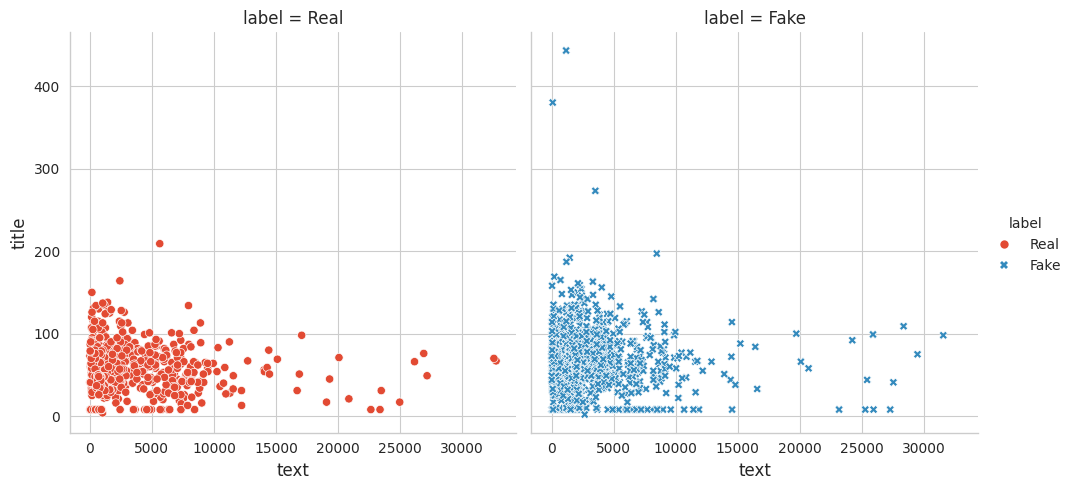

In [51]:
title_len = df['title'].apply(len)
text_len = df['text'].apply(len)

plt.figure(figsize = (15,10))
sns.relplot(
    data=df, x=text_len, y=title_len,
    col="label", hue="label", style="label",
    kind="scatter"
)
plt.show()

### Key Insights  
1. **Title vs. Content Length**: The visualization helps in understanding the correlation between the length of the title and the main content.  
2. **Segmentation by Label**: Grouping by labels reveals how this relationship varies across different categories of news articles.  
3. **Patterns in Data**: Any outliers or clusters in the data can provide useful insights for feature engineering or model refinement.  

### Visualizing the Distribution of News Types Across Sources

In this section, we explore how different news sources (such as authors or outlets) relate to the authenticity of the news. By visualizing the distribution of news types (real vs. fake) across various sources, we gain insights into potential patterns and biases in the dataset.


<ipython-input-52-0122152d3d5e>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='label', ylabel='type'>

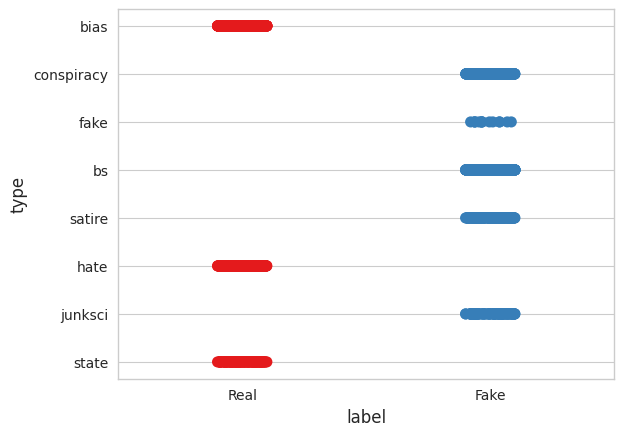

In [52]:
sns.stripplot(x="label", y="type", data=df, size=8, palette="Set1")

The plot helps to visually represent how different sources contribute to the spread of misinformation, aiding in the identification and classification of news authenticity. This analysis is crucial for understanding how source information can help distinguish between credible and misleading content.

### Analyzing News Distribution by Type and Source

In this section, we visualize the distribution of real vs. fake news across different sources. The plot shows the count of news articles, categorized by authenticity (real or fake) and grouped by their source. By breaking down the data this way, we can better understand how different sources contribute to the spread of misinformation.


<Figure size 800x1000 with 0 Axes>

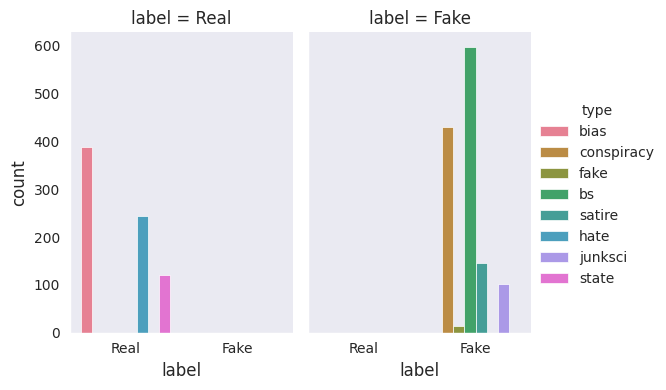

In [53]:
plt.figure(figsize = (8,10))
sns.set_style("dark")
sns.catplot(x="label", hue="type", col="label",
                data=df, kind="count",
                height=4, aspect=.7);

This visualization helps in identifying any patterns in the dataset, such as whether certain sources tend to publish more fake news than others. This analysis is key for improving the classification of news authenticity based on the source of the article.

### Identifying the Most Frequent Words and Bigrams

In this section, we analyze the most common words and word pairs (bigrams) in the news articles. By identifying the top unigrams (single words) and bigrams (two-word combinations), we gain insights into the key terms and phrases used across the dataset. This helps us understand the language patterns that may indicate whether the news is real or fake.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n = None):
    """
    A function that returns the top 'n' unigrams used in the corpus
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    freq_sorted = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return freq_sorted[:n]


def get_top_n_bigram(corpus, n = None):
    """
    A function that returns the top 'n' bigrams used in the corpus
    """
    vec = CountVectorizer(ngram_range = (2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    freq_sorted = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return freq_sorted[:n]

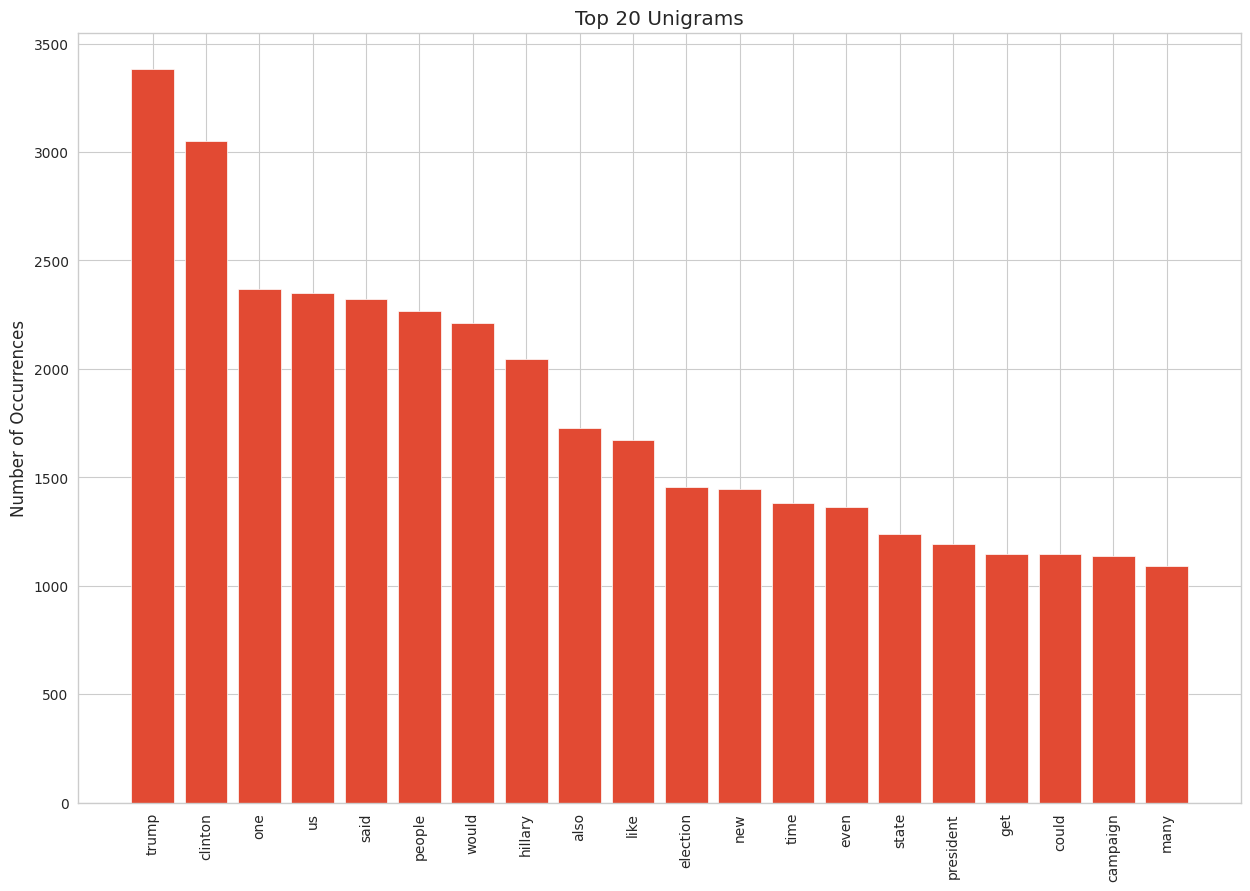

In [75]:
top_unigram = get_top_n_words(df['text_without_stopwords'], 20)

words_unigram = [i[0] for i in top_unigram]
count_unigram = [i[1] for i in top_unigram]

plt.figure(figsize=(15,10))
plt.bar(words_unigram, count_unigram, align='center')
plt.xticks(rotation=90)
plt.ylabel('Number of Occurrences')
plt.title('Top 20 Unigrams')
plt.show()

The visualization **displays the top 20 most frequent unigrams**, allowing us to identify common themes, terms, or potential indicators of news authenticity. Similarly, examining the bigrams reveals important two-word combinations that may be characteristic of either real or fake news. This analysis is crucial for further enhancing our classification model based on the language used in the articles.

In this section, we visualize the **top 20 most frequent bigrams (two-word combinations)** in the dataset. By identifying these common bigrams, we can uncover important phrases that might provide insights into the language patterns associated with real or fake news.

The bar chart below shows the 20 most frequent bigrams and their occurrence count, helping us understand the two-word combinations that are most prevalent across the news articles. Analyzing these bigrams can reveal important trends or indicators related to news authenticity.

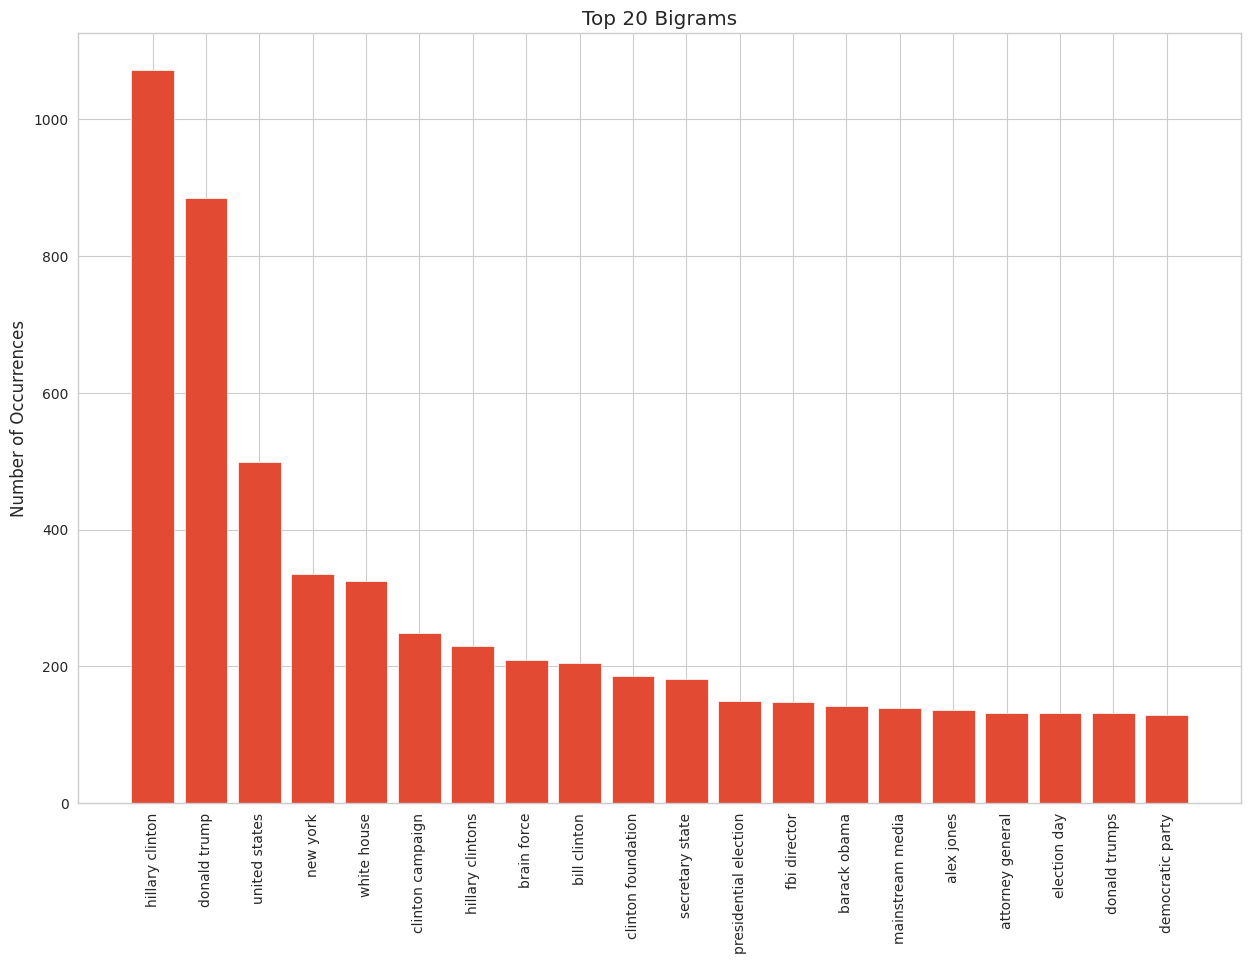

In [76]:
top_bigram = get_top_n_bigram(df['text_without_stopwords'], 20)

words_bigram = [i[0] for i in top_bigram]
count_bigram = [i[1] for i in top_bigram]

plt.figure(figsize=(15,10))
plt.bar(words_bigram, count_bigram, align='center')
plt.xticks(rotation=90)
plt.ylabel('Number of Occurrences')
plt.title('Top 20 Bigrams')
plt.show()

### Distribution of Articles by Language

In this section, we examine the distribution of news articles across different languages. The plot provides a clear overview of how many articles are available in each language within the dataset.

<Axes: xlabel='count', ylabel='language'>

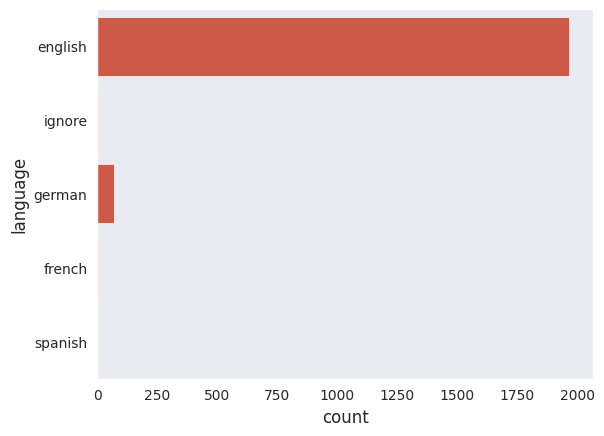

In [55]:
sns.countplot(df['language'])

By visualizing the count of articles per language, we can gain insights into the diversity of sources and the linguistic distribution of the news articles, which may also impact the classification and detection of fake news.

### Visualizing Word Frequency with a Word Cloud

In this section, we create a word cloud to visualize the most frequent words in the news articles. The word cloud highlights the most commonly used terms, with larger words indicating higher frequency. By generating this visualization, we can quickly identify prominent words that may be relevant for detecting patterns in real or fake news.


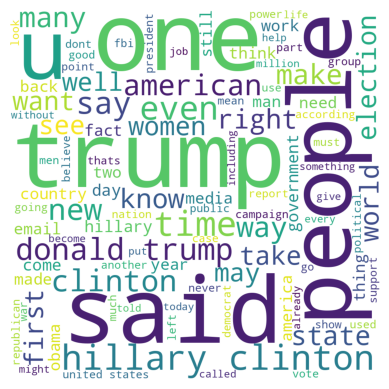

In [56]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(df['text_without_stopwords']))
plt.imshow(wc)
plt.axis('off')
plt.show()


The word cloud is generated from the preprocessed text of the articles, excluding common stopwords. This provides a clearer picture of the key terms in the dataset, which could inform the classification of news authenticity.

### Articles with Images vs. News Label

In this section, we analyze the relationship between the presence of images in news articles and their authenticity (real or fake). The bar chart visualizes how articles with or without images are distributed across the different news labels.


In [57]:
fig = px.bar(df, x='hasImage', y='label',title='Articles Including Images vs Label')
fig.show()

By exploring this relationship, we can investigate whether there is any correlation between the inclusion of images and the authenticity of the news, which may provide additional insights for identifying fake news.

### Displaying News Article Images

In this section, we display the images associated with news articles using their image URLs. By extracting the URLs of images from the dataset, we can visually compare images from real and fake news articles.

The table below shows the images for a subset of real and fake news articles, providing a visual context that may help in identifying patterns or differences between authentic and misleading content.


In [58]:
# Using HTML to view the images given in form of image URL

from IPython.core.display import HTML

def convert(path):
    return '<img src="'+ path + '" width="80">'
df_sources = df[['site_url','label','main_img_url', 'title_without_stopwords']]
df_r = df_sources.loc[df['label']== 'Real'].iloc[6 : 10,:]
df_f = df_sources.loc[df['label']== 'Fake'].head(6)

HTML(df_r.to_html(escape = False, formatters = dict(main_img_url = convert)))

,site_url,label,main_img_url,title_without_stopwords
6,100percentfedup.com,Real,,breaking nypd ready make arrests weiner casehillary visited pedophile island least timesmoney laundering underage sex payforplayproof inappropriate handling classified information percentfedupcom
7,100percentfedup.com,Real,,wow whistleblower tells chilling story massive voter fraud trump campaign readies lawsuit fl sec elections critical district video percentfedupcom
8,100percentfedup.com,Real,,breaking clinton clearedwas coordinated last minute trick energize hillarys base percentfedupcom
9,100percentfedup.com,Real,,evil hillary supporters yell fck trumpburn truck daddy fishing yr son trump bumperstickers video percentfedupcom


In [77]:
HTML(df_f.to_html(escape = False, formatters = dict(main_img_url = convert)))

,site_url,label,main_img_url,title_without_stopwords
33,21stcenturywire.com,Fake,,intl community still financing protecting terrorists mother agnes vanessa beeley syria
34,21stcenturywire.com,Fake,,fbi director comeys leaked memo explains hes reopening clinton email case
35,21stcenturywire.com,Fake,,fbi redux whats behind new probe hillary clinton emails
36,21stcenturywire.com,Fake,,party corruption clinton campaign directly tied disgraced dnc consultant
37,21stcenturywire.com,Fake,,hillarys russian hack hoax biggest lie election season
38,21stcenturywire.com,Fake,,partners crime goldman sachs clintons wall street


From the analysis, we observe that the majority of fake news in the dataset is attributed to the website **21stcenturywire.com**. This insight highlights the importance of examining the sources of news articles, as certain outlets may have a higher prevalence of misleading or false content. Understanding such patterns can aid in the development of more accurate fake news detection systems.

### Proportion of Real vs. Fake News

In this section, we visualize the distribution of real and fake news articles in the dataset. The pie chart illustrates the proportion of each label, providing a clear overview of how the articles are divided between real and fake news.


In [60]:
fig = px.pie(df,names='label',title='Proportion of Real vs. Fake News',color_discrete_sequence=px.colors.sequential.Viridis_r)
fig.show()

This visualization helps to quickly assess the balance of authentic versus misleading content, which is crucial for understanding the challenges of fake news detection and the dataset's composition.

### Identifying Sources of Fake News

In this section, we examine which websites are associated with fake news articles in the dataset. The output lists the unique sites that are primarily delivering fake news content, providing insights into the sources that may require closer scrutiny for fake news detection.

In [79]:
df[df['label'] == 'Fake']['site_url'].unique()

array(['21stcenturywire.com', 'abcnews.com.co', 'abeldanger.net',
       'abovetopsecret.com', 'activistpost.com', 'adobochronicles.com',
       'ahtribune.com', 'allnewspipeline.com', 'americannews.com',
       'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com',
       'awdnews.com', 'barenakedislam.com', 'clickhole.com',
       'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org',
       'counterpunch.org', 'darkmoon.me', 'davidduke.com',
       'davidstockmanscontracorner.com', 'davidwolfe.com',
       'dcclothesline.com', 'defenddemocracy.press',
       'dennismichaellynch.com', 'departed.co', 'der-postillon.com',
       'fromthetrenchesworldreport.com', 'frontpagemag.com',
       'galacticconnection.com', 'globalresearch.ca', 'infowars.com',
       'intrepidreport.com', 'legorafi.fr', 'madworldnews.com',
       'naturalnews.com', 'newstarget.com', 'presstv.ir',
       'prisonplanet.com', 'projectveritas.com', 'returnofkings.com',
       'shiftfrequency.com', '

### Identifying Sources of Real News

In this section, we identify the websites that are primarily publishing real news articles in the dataset. The output lists the unique sites delivering authentic content, providing insights into trusted sources that consistently share factual information.

In [80]:
df[df['label'] == 'Real']['site_url'].unique()

array(['100percentfedup.com', 'addictinginfo.org', 'dailywire.com',
       'davidduke.com', 'fromthetrenchesworldreport.com',
       'frontpagemag.com', 'newstarget.com', 'politicususa.com',
       'presstv.com', 'presstv.ir', 'prisonplanet.com',
       'proudemocrat.com', 'redstatewatcher.com', 'returnofkings.com',
       'washingtonsblog.com', 'westernjournalism.com',
       'whydontyoutrythis.com', 'wnd.com'], dtype=object)

### Identifying Websites Publishing Both Real and Fake News

In this section, we investigate if there are any websites that publish both real and fake news articles. By checking for overlapping sites between real and fake news, we can identify sources that may present a mix of authentic and misleading content, which can complicate efforts to classify news accurately.

In [64]:
real = set(df[df['label'] == 'Real']['site_url'].unique())
fake = set(df[df['label'] == 'Fake']['site_url'].unique())
print(f"Websites publishing both real & fake news are {real & fake}")

Websites publishing both real & fake news are {'westernjournalism.com', 'returnofkings.com', 'davidduke.com', 'frontpagemag.com', 'fromthetrenchesworldreport.com', 'newstarget.com', 'presstv.ir', 'prisonplanet.com', 'washingtonsblog.com'}


While identifying websites that predominantly publish fake news is important, it’s also crucial to consider sites where only one or two articles are fake. These sites may not be classified as fake news outlets overall, but even a small amount of misleading content can have significant impact. This analysis helps to identify such sites, ensuring a more comprehensive understanding of the spread of fake news.

### Identifying Websites with Few Fake News Articles

In this section, we focus on identifying websites that have a small number of fake news articles. The output displays the bottom 10 sites that publish the least amount of fake news, helping to highlight sources where misinformation is less frequent, but still present. This analysis provides a more nuanced view of how fake news is spread across different platforms.


In [65]:
df[df['label'] == 'Fake']['site_url'].value_counts().tail(10)

,count
site_url,
allnewspipeline.com,1
defenddemocracy.press,1
projectveritas.com,1
presstv.ir,1
barenakedislam.com,1
madworldnews.com,1
intrepidreport.com,1
globalresearch.ca,1
davidduke.com,1


### Converting Categorical Data to Numerical Format

In this section, we convert the "type" column from categorical (text-based) data to numerical format. This transformation is essential for machine learning algorithms, which typically require numerical input. We use label encoding to assign a unique number to each category, facilitating further analysis and model development.

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() ## Converting the type column from object datatype to numerical datatype
df['type'] = le.fit_transform(df['type'])
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,0,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,0,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


### Label Encoding and Visualizing Data Distribution

In this section, we first perform label encoding on the different categories of news types (such as bias, conspiracy, fake, etc.), converting them into numerical values for easier analysis. The mapping of each category to its corresponding numeric label is displayed, which helps to understand how the categorical data is transformed.

Next, we use a **sunburst chart** to visualize the hierarchical relationship between the news labels and their corresponding types. This visualization provides a clear, interactive view of how the news categories are distributed, allowing for a better understanding of the proportions and relationships within the dataset.

In [67]:
le.classes_
le.transform(['bias', 'bs', 'conspiracy', 'fake', 'hate', 'junksci', 'satire' , 'state'])
mapping = {}
for i in le.classes_:
    mapping[i] = le.transform([i])[0]
print(mapping)

fig = px.sunburst(df, path=['label', 'type'])
fig.show()

{'bias': 0, 'bs': 1, 'conspiracy': 2, 'fake': 3, 'hate': 4, 'junksci': 5, 'satire': 6, 'state': 7}


In this section, the **LabelEncoder** has assigned numerical labels to different types of news categories. For example, "bias" has been labeled as 0, "bs" as 1, "conspiracy" as 2, and so on. This conversion allows us to work with numerical values for machine learning and data analysis, making it easier to process the categorical data.

### Analyzing Websites and the Types of Stories They Publish

In this section, we analyze the types of stories published by different websites. For each news type (such as bias, conspiracy, or fake), we identify the unique sites that publish articles belonging to that category. This helps to understand which sites are more likely to publish specific types of content, providing valuable insights for detecting and classifying news based on its source and type.


In [70]:
def sites_type(df):
    types = df['type'].unique()
    for type in types:
        df_type = df[df['type'] == type]
        type = le.inverse_transform([type])
        print(f"The unique sites publishing article of type {type[0]} are: {df_type['site_url'].unique()}")
        print()

sites_type(df)

The unique sites publishing article of type bias are: ['100percentfedup.com' 'addictinginfo.org' 'dailywire.com'
 'newstarget.com' 'politicususa.com' 'prisonplanet.com' 'proudemocrat.com'
 'washingtonsblog.com' 'westernjournalism.com' 'whydontyoutrythis.com'
 'wnd.com']

The unique sites publishing article of type conspiracy are: ['21stcenturywire.com' 'activistpost.com' 'awdnews.com'
 'galacticconnection.com' 'globalresearch.ca' 'infowars.com'
 'naturalnews.com' 'newstarget.com' 'presstv.ir' 'prisonplanet.com']

The unique sites publishing article of type fake are: ['abcnews.com.co' 'adobochronicles.com']

The unique sites publishing article of type bs are: ['abeldanger.net' 'abovetopsecret.com' 'ahtribune.com'
 'allnewspipeline.com' 'americannews.com' 'americasfreedomfighters.com'
 'amren.com' 'amtvmedia.com' 'barenakedislam.com' 'coasttocoastam.com'
 'corbettreport.com' 'countercurrents.org' 'counterpunch.org'
 'darkmoon.me' 'davidduke.com' 'davidstockmanscontracorner.com'
 'davidwo

Modelling
In the dataset, all the values are ordered. Therefore, we need to reshuffle these values.